In [1]:
%matplotlib inline

%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
%autoreload 2
from src.pySRM.pysrm.imzml import IMZMLExtract
%autoreload 2
from src.pySRM.pysrm.comparative import CombinedSpectra

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


In [2]:
! ls /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML

VAN0010-LK-155-40-IMS_PosMode.ibd
VAN0010-LK-155-40-IMS_PosMode.imzML
VAN0010-LK-155-40-IMS_PosMode.imzML.regions


In [8]:
! rm /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML.regions

In [3]:
imze = IMZMLExtract("/mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML")

Opening regions file for /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML


1 ((1, 1, 1342, 1342), 1)
2 ((501, 2163, 569, 842), 393413)
3 ((2489, 2489, 1, 1), 1)


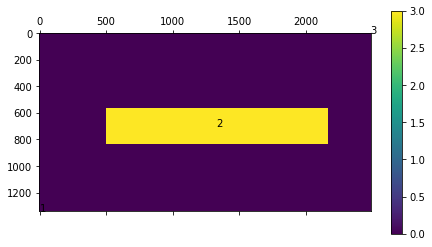

{1: ((1, 1, 1342, 1342), 1),
 2: ((501, 2163, 569, 842), 393413),
 3: ((2489, 2489, 1, 1), 1)}

In [4]:
imze.list_regions()

In [5]:
spectra2_orig = imze.get_region_array(2, makeNullLine=True)

Fetching region range
Fetching region shape
Found region 2 with shape (1663, 274, 61)
Fetching region spectra
100% (393413 of 393413) |################| Elapsed Time: 0:01:43 Time:  0:01:43
100% (393413 of 393413) |################| Elapsed Time: 0:00:03 Time:  0:00:03


In [6]:
spectra2_intra = imze.normalize_region_array(spectra2_orig, normalize="intra_median")
spectra2 = imze.normalize_region_array(spectra2_intra, normalize="inter_median")

Started Log Value: 100.0
100% (1663 of 1663) |####################| Elapsed Time: 0:00:13 Time:  0:00:13
Got 393077 median-enabled pixels
5-Number stats for medians: (455662, 393077, 0.0, 0.6269781461944235, 0.8544891640866873, 1.079016691698337, 2.958079409048938)
Started Log Value: 118.63738632202148
100% (1663 of 1663) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
Got a total of 27795382 fold changes
Median elements [13897691]
Median elements
Global Median 0.79762


Started Log Value: 100.0


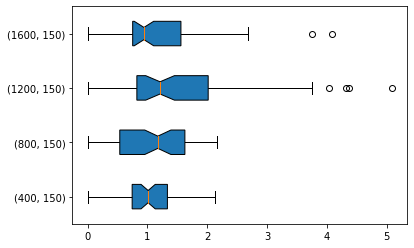

In [7]:
imze.plot_fcs(spectra2_orig, [(400,150), (800,150), (1200,150), (1600, 150)])

Started Log Value: 148.73923211807815


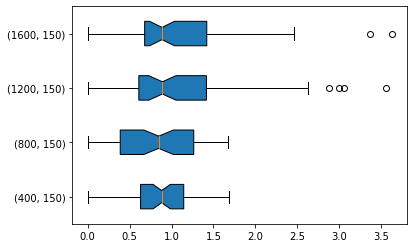

In [8]:
imze.plot_fcs(spectra2, [(400,150), (800,150), (1200,150), (1600, 150)])

In [9]:
spec = SpectraRegion(spectra2, imze.mzValues)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [ ]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9)

2020-09-28 14:33:13,023  SpectraRegion  INFO: Calculating clusters
2020-09-28 14:33:13,024  SpectraRegion  INFO: Elem Matrix of shape: (455662, 61)
2020-09-28 14:33:13,416  SpectraRegion  INFO: UMAP reduction


In [ ]:
spec.plot_segments()